### Libraries 

In [1]:
### Nen ghi ra file text sau moi lan chay,
### tien xu ly nen bo cac trang web co link


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pandas_profiling import ProfileReport
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster
from pyvi import ViPosTagger, ViTokenizer
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/var/folders/6v/nymwmjk912d8glyc17sfhddr0000gn/T/ipykernel_5339/1494690340.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
df1 = pd.read_csv("Products_Shopee_comments.csv", encoding="utf-8")

In [4]:
df1.head()

product_id               category     sub_category                user  \
0          32  ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán  B·∫£o v·ªá m√†n h√¨nh            sangth63   
1          32  ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán  B·∫£o v·ªá m√†n h√¨nh  truongthinga260787   
2          32  ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán  B·∫£o v·ªá m√†n h√¨nh             n*****0   
3          32  ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán  B·∫£o v·ªá m√†n h√¨nh           hoanhq123   
4          32  ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán  B·∫£o v·ªá m√†n h√¨nh         vanguyen411   

   rating                                            comment  
0       3  Mi·∫øng d√°n h∆°i d·∫ßy ko th·∫©m m·ªπ. Qan trong l√† ko ...  
1       3  Mua nhi·ªÅu mi·∫øng d√°n ·ªü shop r·ªìi, nh∆∞ng th·∫≠t s·ª± ...  
2       3                                                NaN  
3       3                                                NaN  
4       2  Giao sai sp, ƒë·∫∑t 1 c∆∞·ªùng l·ª±c tr·∫Øng cho 8+ nh∆∞n...

In [5]:
#profile = ProfileReport(df)
#profile

In [6]:
df1.shape

(1903157, 6)

In [7]:
df1['rating'].value_counts()

5    1151138
4     284774
3     199896
1     152590
2     114759
Name: rating, dtype: int64

In [8]:
df1['category'].value_counts()

Th·ªùi Trang Nam             1041870
Th·ªùi Trang N·ªØ               584108
M·∫π & B√©                     104958
ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán        97403
Nh√† C·ª≠a & ƒê·ªùi S·ªëng           18357
Thi·∫øt B·ªã ƒêi·ªán T·ª≠             17129
M√°y T√≠nh & Laptop            14820
M√°y ·∫¢nh & M√°y Quay Phim       5251
S·∫Øc ƒê·∫πp                       1261
Name: category, dtype: int64

#### Cac mat hang chu yeu thuoc nhom:
Th·ªùi Trang Nam 
Th·ªùi Trang N·ªØ               
M·∫π & B√©             
ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán

In [9]:
df1.groupby('rating')['category'].value_counts()

rating  category               
1       Th·ªùi Trang N·ªØ               51928
        Th·ªùi Trang Nam              44889
        ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán       22031
        M·∫π & B√©                     19603
        Nh√† C·ª≠a & ƒê·ªùi S·ªëng           5211
        Thi·∫øt B·ªã ƒêi·ªán T·ª≠             3861
        M√°y T√≠nh & Laptop            3318
        M√°y ·∫¢nh & M√°y Quay Phim      1005
        S·∫Øc ƒê·∫πp                       385
2       Th·ªùi Trang N·ªØ               44073
        Th·ªùi Trang Nam              26247
        ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán       17459
        M·∫π & B√©                     14483
        Nh√† C·ª≠a & ƒê·ªùi S·ªëng           5455
        Thi·∫øt B·ªã ƒêi·ªán T·ª≠             3119
        M√°y T√≠nh & Laptop            2504
        M√°y ·∫¢nh & M√°y Quay Phim       705
        S·∫Øc ƒê·∫πp                       522
3       Th·ªùi Trang N·ªØ               69337
        Th·ªùi Trang Nam              67419
        M·∫π & B√©            

###: 
Ta s·∫Ω lo·∫°i b·ªè b·ªõt c√°c nh√≥m s·∫£n ph·∫©m kh√¥ng c√≥ nhi·ªÅu rating:
- M√°y ·∫¢nh & M√°y Quay Phim 
- S·∫Øc ƒê·∫πp

In [10]:
df1 = df1.drop(df1[df1['category'] == 'M√°y ·∫¢nh & M√°y Quay Phim'].index)
df1 = df1.drop(df1[df1['category'] == 'S·∫Øc ƒê·∫πp'].index)

In [11]:
df1.shape

(1896645, 6)

### EDA

### Ph√¢n chia theo nh√≥m
Ta s·∫Ω chia b·ªô d·ªØ li·ªáu theo th√†nh t·ª´ng nh√≥m (class), trong ƒë√≥:
- 1-2: rating kh√¥ng th√≠ch
- 3: rating trung t√≠nh
- 4-5: rating th√≠ch

#### Rating 'Not Like' 

In [12]:
df_notlike = df1[df1['rating'] < 3 ]

In [13]:
df_notlike['category'].value_counts()

Th·ªùi Trang N·ªØ            96001
Th·ªùi Trang Nam           71136
ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán    39490
M·∫π & B√©                  34086
Nh√† C·ª≠a & ƒê·ªùi S·ªëng       10666
Thi·∫øt B·ªã ƒêi·ªán T·ª≠          6980
M√°y T√≠nh & Laptop         5822
Name: category, dtype: int64

<AxesSubplot: >

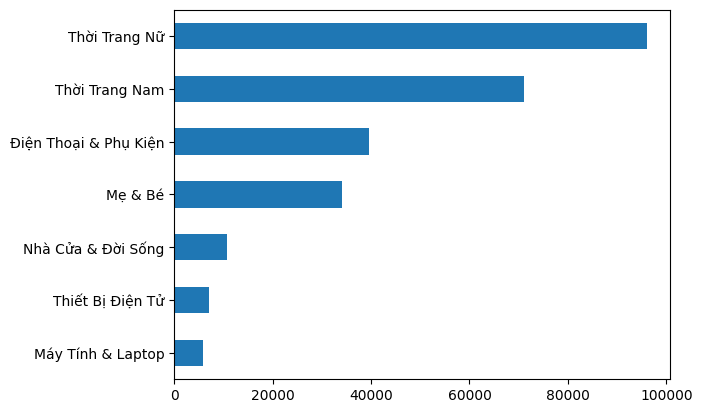

In [14]:
df_notlike.category.value_counts().sort_values().plot(kind = 'barh')

### 
Nh√≥m rating n√†y t·∫≠p trung v√†o 4 nh√≥m s·∫£n ph·∫©m ch√≠nh:
- Th·ªùi trang nam
- Th·ªùi trang n·ªØ
- ƒêt & Ph·ª• ki√™n
- M·∫π v√† b√©
### Ch·ªß y·∫øu v√¢n l√† nh√≥m ng√†nh th·ªùi trang

### NEUTRAL

In [15]:
df_neutral= df1[df1['rating'] == 3 ]

In [16]:
df_neutral['category'].value_counts()

Th·ªùi Trang N·ªØ            69337
Th·ªùi Trang Nam           67419
M·∫π & B√©                  26594
ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán    22240
Nh√† C·ª≠a & ƒê·ªùi S·ªëng        4775
Thi·∫øt B·ªã ƒêi·ªán T·ª≠          4074
M√°y T√≠nh & Laptop         3528
Name: category, dtype: int64

<AxesSubplot: >

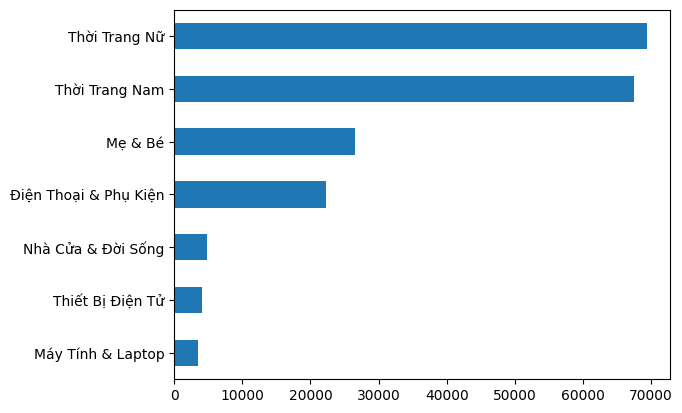

In [17]:
df_neutral.category.value_counts().sort_values().plot(kind = 'barh')

####
- kh√¥ng c√≥ s·ª± thay ƒë·ªïi nhi·ªÅu khi 4 nh√≥m ng√†nh nh∆∞ ƒë√£ ph√¢n t√≠ch ph·∫ßn tr√™n chi·∫øm ƒëa s·ªë, rating v·∫´n ch·ªß y√™u l√† nh√≥m ng√†nh th·ªùi trang

### LIKE

In [18]:
df_like = df1[df1['rating'] > 3 ]

In [19]:
df_like['category'].value_counts()

Th·ªùi Trang Nam           903315
Th·ªùi Trang N·ªØ            418770
M·∫π & B√©                   44278
ƒêi·ªán Tho·∫°i & Ph·ª• Ki·ªán     35673
Thi·∫øt B·ªã ƒêi·ªán T·ª≠           6075
M√°y T√≠nh & Laptop          5470
Nh√† C·ª≠a & ƒê·ªùi S·ªëng         2916
Name: category, dtype: int64

<AxesSubplot: >

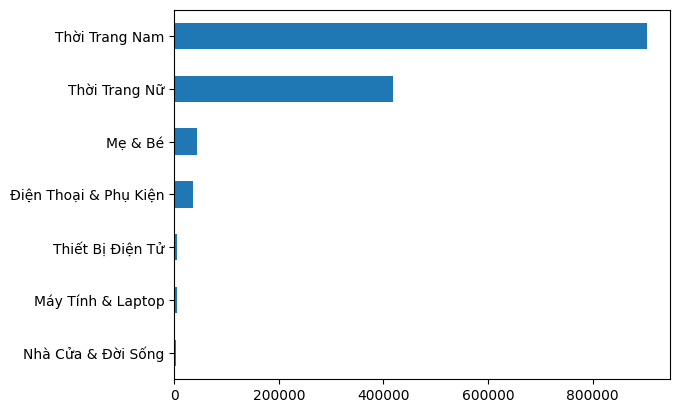

In [20]:
df_like.category.value_counts().sort_values().plot(kind = 'barh')

###
- ·ªû nh√≥m rating th√≠ch (h√†i l√≤ng), s·ª± ph√¢n bi·ªát r√µ r·ªát khi nh√≥m ng√†nh th·ªùi trang ƒë∆∞·ª£c rating nhi·ªÅu

### Isnull 
- Ki·ªÉm tra isnull ƒë·ªÉ ch√∫ng ta xem c√≥ c·∫ßn lo·∫°i b·ªè hay kh√¥ng 
- V√† c√°c c·ªôt kh√¥ng c√≥ comment th∆∞·ªùng ƒë∆∞·ª£c rating ra sao

In [21]:
df2 = df1[["rating","comment"]].copy()

In [22]:
df2.isna().sum()

rating          0
comment    955139
dtype: int64

In [23]:
df2.isnull().sum()

rating          0
comment    955139
dtype: int64

In [24]:
df_isnull = df2[df2['comment'].isnull()]

In [25]:
df_isnull.head()

rating comment
2        3     NaN
3        3     NaN
8        1     NaN
12       1     NaN
14       3     NaN

In [26]:
df_count = df_isnull['rating'].value_counts()
df_result = pd.DataFrame(df_count)
df_result = df_result.reset_index()
df_result.columns = ['rating','value_counts']
print(df_result)

   rating  value_counts
0       5        647505
1       4        143949
2       3         85940
3       1         43620
4       2         34125


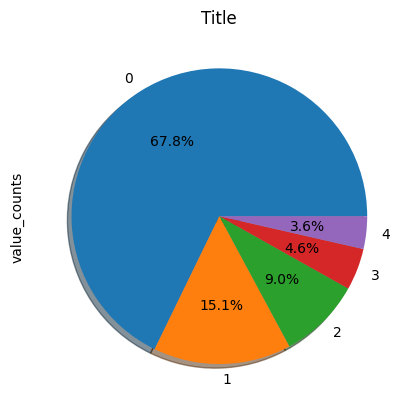

In [27]:
plot = df_result.plot.pie(y='value_counts', title="Title", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

### 
- C√≥ ƒë·∫øn h∆°n 90% Nan values thu·ªôc nh√≥m rating t·ª´ trung t√≠nh tr·ªü l√™n, v√† ph·∫ßn l·ªõn h∆°n 80% thu·ªôc rating th√≠ch.
- Nghƒ©a l√† c√°c kh√°ch kh√¥ng comment ƒë·∫°i ƒëa s·ªë l√† h√†i l√≤ng ho·∫∑c √≠t nh·∫•t kh√¥ng ph√†n n√†n v·ªÅ s·∫£n ph·∫©m.
- N·∫øu ta nh√¨n l·∫°i to√†n b·ªô dataset th√¨ g·∫ßn 90% b·ªô d·ªØ li·ªáu thu·ªôc nh√≥m rating trung t√≠nh tr·ªü l√™n, nh∆∞ v·∫≠y ta c√≥ th·ªÉ lo·∫°i b·ªè isnull, ƒë·ªÉ b·ªô d·ªØ li·ªáu kh√¥ng b·ªã ch√™nh l·ªách qu√° nhi·ªÅu.

In [28]:
df3 = df1[~df1['comment'].isnull()]

In [29]:
# Check duplicates
df3.duplicated().sum()

6963

In [30]:
# Drop duplicates
df3.drop_duplicates(inplace=True)

In [31]:
df_http = pd.DataFrame()

In [32]:
for index, row in df3.sample(50).iterrows():
    print(row['comment'])

, Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi
√Åo qu√° d√†i so vs 1m55 m·∫∑c d√π m√¨nh ƒë·∫∑t size nh·ªè nh·∫•t r·ªìi. H∆°i bu·ªìn üò≠üò≠
V√°y nh·∫≠n ƒë∆∞·ª£c kh√¥ng gi·ªëng 
Ko h·ªÅ gi·ªëng v·ªõi h√¨nh ·∫£nh qu·∫£ng c√°o Ki·ªÉu gi·ªëng nh∆∞ giao ƒë·∫°i cho c√≥ v·∫≠y , m mua tr√≤ng c·ªï ch·ª© c√≥ mua c√°i ki·ªÉu k·∫πp ƒë·ªÉ b√†n th√¥ng th∆∞·ªùng ƒë√¢u
, Ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi, ƒê√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ƒë·∫πp v√† ch·∫Øc ch·∫Øn, R·∫•t ƒë√°ng ti·ªÅn
, Th·ªùi gian giao h√†ng r·∫•t nhanh
Xanh h∆°i t√°i 1 ch√∫t nh∆∞ng ok
Qu·∫ßn ƒë·∫πp. Nh·∫≠n r nh∆∞ng k k·ªãp ch·ª•p l·∫°i. M·∫∑c lu√¥n r. R·∫•t thik v√¨ ch·∫•t h∆°n c·∫£ mong ƒë·ª£i. L·∫°i sƒÉn th√™m v√†i m√≥n c·ªßa Shop ƒë√¢y
C√°i n√†o c≈©ng b·ªã b·∫©n
S·∫£n ph·∫©m t·ªët, ƒë√≥ng g√≥i c·∫©n th·∫≠n, giao nhanh, ph√π h·ª£p gi√° ti·ªÅn. From ƒë·∫πp
, ƒê√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ƒë·∫πp v√† ch·∫Øc ch·∫Øn, Shop ph·ª•c v·ª• r·∫•t t·ªët, R·∫•t ƒë√°ng ti·ªÅn
C√≥ nhi·ªÅu v·∫£i th·ª´a v√† h∆°i m·ªèng h∆°i d∆° m·ªôt ch√∫t....

In [33]:
df3.shape

(934543, 6)

### 
- Trong b√†i to√°n n√†y, b·ªô d·ªØ li·ªáu ch·ªâ c·∫ßn gi·ªØ l·∫°i feature rating v√† comment

In [34]:
df4 = df3[['rating','comment']]

In [35]:
conditions = [
    (df4['rating'] < 3),
    (df4['rating'] == 3),
    (df4['rating'] > 3)
]

values = ['negative', 'neutral', 'positive']

df4['class'] = np.select(conditions, values)
df4 = df4[['comment','class']]

In [36]:
df4.reset_index(drop=True, inplace=True)

In [37]:
df4.head()

comment     class
0  Mi·∫øng d√°n h∆°i d·∫ßy ko th·∫©m m·ªπ. Qan trong l√† ko ...   neutral
1  Mua nhi·ªÅu mi·∫øng d√°n ·ªü shop r·ªìi, nh∆∞ng th·∫≠t s·ª± ...   neutral
2  Giao sai sp, ƒë·∫∑t 1 c∆∞·ªùng l·ª±c tr·∫Øng cho 8+ nh∆∞n...  negative
3  ƒê√£ nh·∫≠n ƒëc h√†ng, c·∫£m quan ban ƒë·∫ßu th√¨ kh√° ok, ...  negative
4  Ch·∫•t l∆∞·ª£ng c√°i c∆∞·ªùng l·ª±c ch·ªëng nh√¨n tr·ªôm kh√¥ng...  negative

In [38]:
df4.isnull().sum()

comment    0
class      0
dtype: int64

In [39]:
df4['class'].value_counts()

positive    636052
negative    186399
neutral     112092
Name: class, dtype: int64

In [40]:
#df_sub = (df4[df4['class']== 'like']).sample(frac=0.5)

In [41]:
#df_sub.shape

In [42]:
#df = df4.drop(df_sub.index)

In [43]:
#df['class'].value_counts()

In [44]:
#df_test = df4.sample(frac=0.02)

In [45]:
from xulyvni import *

In [46]:
#x = xuly_vni(subset_df)

In [47]:
#x.head()

### Clean Text

### 
- T√°c gi·∫£ s·ª≠ d·ª•ng th∆∞ vi·ªán dask ƒë·ªÉ x·ª≠ l√Ω song song

In [48]:
# Create a cluster
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

2023-03-27 20:06:20,883 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/6v/nymwmjk912d8glyc17sfhddr0000gn/T/dask-worker-space/worker-h_18z4j4', purging
2023-03-27 20:06:20,884 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/6v/nymwmjk912d8glyc17sfhddr0000gn/T/dask-worker-space/worker-k2gsb_ms', purging


In [49]:
from xulyvni import xuly_vni

In [50]:
# Create a dask dataframe from the pandas dataframe
ddf = dd.from_pandas(df4, npartitions=16)
ddf = ddf.map_partitions(xuly_vni)

In [51]:
# Convert the dask dataframe to pandas dataframe
print('Converting dask dataframe to pandas dataframe...')
with ProgressBar():
    df = ddf.compute(num_workers=7)

# Free up memory
del ddf

Converting dask dataframe to pandas dataframe...
[########################################] | 100% Completed | 35m 5ss


In [52]:
# Check the first 5 rows
df.head()

comment     class  \
0  Mi·∫øng d√°n h∆°i d·∫ßy ko th·∫©m m·ªπ. Qan trong l√† ko ...   neutral   
1  Mua nhi·ªÅu mi·∫øng d√°n ·ªü shop r·ªìi, nh∆∞ng th·∫≠t s·ª± ...   neutral   
2  Giao sai sp, ƒë·∫∑t 1 c∆∞·ªùng l·ª±c tr·∫Øng cho 8+ nh∆∞n...  negative   
3  ƒê√£ nh·∫≠n ƒëc h√†ng, c·∫£m quan ban ƒë·∫ßu th√¨ kh√° ok, ...  negative   
4  Ch·∫•t l∆∞·ª£ng c√°i c∆∞·ªùng l·ª±c ch·ªëng nh√¨n tr·ªôm kh√¥ng...  negative   

                                      processed_text  
0                       mi·∫øng d√°n h∆°i_d·∫ßy kh√¥ng_th·∫©m  
1  mi·∫øng d√°n r·∫•t_t·ªìi b√≥c b·ª•i gi·∫£i_quy·∫øt th·ªèa_ƒë√°ng...  
2                            c∆∞·ªùng_l·ª±c tr·∫Øng m√†u ƒëen  
3  h√†ng c·∫£m_quan ƒë·∫ßu m·∫∑t x∆∞·ªõc d√£ d√°n chi·ªÅu t·ªëi x∆∞...  
4  ch·∫•t_l∆∞·ª£ng c∆∞·ªùng_l·ª±c ch·ªëng tr·ªôm kh√¥ng_nh∆∞ qu·∫£n...

In [53]:
for index, row in df.sample(100).iterrows():
    print(row['processed_text'])

h√†ng c·∫≠n date t·∫Øt m√°y h√†ng ch·∫•t_l∆∞·ª£ng
ƒë√≠nh n√∫t qu·∫ßn ki·ªÉu gi·∫∑t b√¢y h·ªôt n√∫t
ƒë·∫πp kh√¥ng_b·∫±ng
kh√¥ng_gi·ªëng m·∫´u manocanh ƒë∆°n h√†ng kh√¥ng_h√†i
ch·∫•t_l∆∞·ª£ng t·∫°m ·ªïn t·∫ßm gi√° kh√¥ng_th·∫•y b√°o ƒë√®n k·∫øt_n·ªëi nh∆∞_c√°c
ƒë√≥ng g√≥i s·∫£n_ph·∫©m
c≈©ng_t·ªët g·ª≠i h√†ng nh·∫ßm
gimbal h∆°i_l·ªèng m√°y ch·ªï h√†nh h∆°i_l√¢u h·ªôp s·ªëp_b·ªã_n·ª©c h√†ng m√≥p h·ªôp b·ªÉ h·ªôp gimbal l·ªèng
t·∫•t b√© h√†ng ch·∫•t_l∆∞·ª£ng t·∫°m
h√†ng ƒë√≥ng_g√≥i c·∫©n_th·∫≠n m·∫∑c √°o_r·ªông

h√†ng h√†ng h√†ng r·∫•t_∆∞ng ƒë·∫πp ch·∫•t_l∆∞·ª£ng th√≠ch th√≠ch
√°o h∆°i_m·ªèng h·ª£p gi√° ti·ªÅn th√≠ch ƒëeph √°o kh√¥ng_qu√° ch·∫•t_l∆∞·ª£ng nhhw ti√™nd
ch·∫•t_l∆∞·ª£ng s·∫£n_ph·∫©m tuy·ªát_v·ªùi ƒë√≥ng_g√≥i s·∫£n_ph·∫©m r·∫•t_ƒë·∫πp r·∫•t_ƒë√°ng ti·ªÅn
ch·∫•t_l∆∞·ª£ng s·∫£n_ph·∫©m tuy·ªát_v·ªùi ƒë√≥ng_g√≥i s·∫£n_ph·∫©m r·∫•t_ƒë·∫πp ph·ª•c_v·ª• r·∫•t_t·ªët r·∫•t_ƒë√°ng ti·ªÅn th·ªùi h√†ng
gi√° h·ª£p_l√Ω m√°y c·ªß m√†ng c·ªß th·ªùi d·ªãch_v·ª• k√®m tr·∫£_l·ªùi nh·∫Øn
ch·∫•t_l∆∞·ª

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
df_final = df[['processed_text','class']]

In [56]:
df_final.head()

processed_text     class
0                       mi·∫øng d√°n h∆°i_d·∫ßy kh√¥ng_th·∫©m   neutral
1  mi·∫øng d√°n r·∫•t_t·ªìi b√≥c b·ª•i gi·∫£i_quy·∫øt th·ªèa_ƒë√°ng...   neutral
2                            c∆∞·ªùng_l·ª±c tr·∫Øng m√†u ƒëen  negative
3  h√†ng c·∫£m_quan ƒë·∫ßu m·∫∑t x∆∞·ªõc d√£ d√°n chi·ªÅu t·ªëi x∆∞...  negative
4  ch·∫•t_l∆∞·ª£ng c∆∞·ªùng_l·ª±c ch·ªëng tr·ªôm kh√¥ng_nh∆∞ qu·∫£n...  negative

In [57]:
df_final['processed_text'].loc[1]

'mi·∫øng d√°n r·∫•t_t·ªìi b√≥c b·ª•i gi·∫£i_quy·∫øt th·ªèa_ƒë√°ng ƒëi·ªán_tho·∫°i'

In [58]:
df_final.to_csv('shopee_final.csv')

### Visualize 

###
- Tr·ª±c quan ho√° b·∫±ng Wordcloud theo class

### Negative

In [61]:
df_final_notlike = df_final[df_final['class'] == 'negative' ]

In [62]:
# negative
wc_notlike = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_notlike.generate(str(df_final_notlike['processed_text'].values))

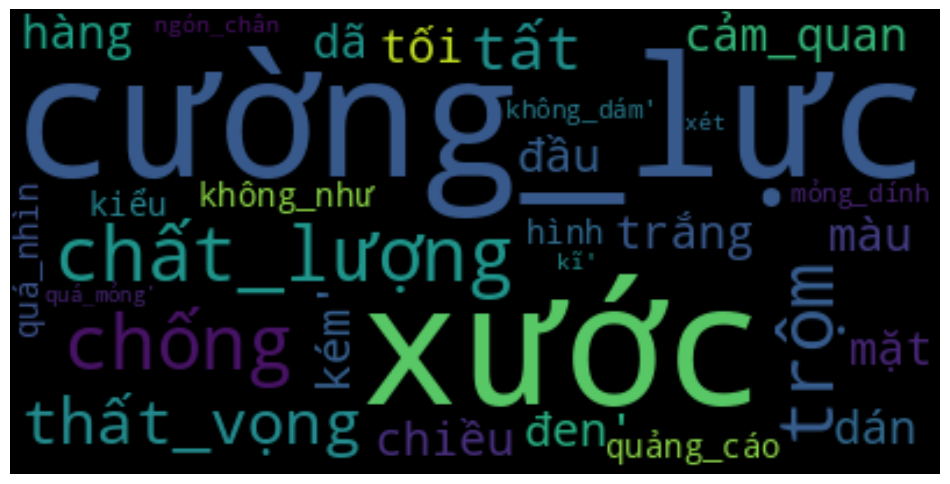

In [63]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nh·∫≠n x√©t:
- Nh·ªØng s·∫£n ph·∫©m b·ªã ch√™ (kh√¥ng h√†i l√≤ng) ch·ªß y·∫øu r∆°i v√†o c√°c v·∫•n ƒë·ªÅ nh∆∞ ch·∫•t l∆∞·ª£ng, ki·ªÉu d√°ng, qu·∫£ng c√°o.
- ƒë√≥ l√† nh·ªØng t·ª´ n·ªïi b·∫≠t ch√∫ng ta c·∫ßn ƒë√†o s√¢u v√†o t·ª´ng nh√≥m ng√†nh ph·ª•.

### Neutral (trung t√≠nh)

In [65]:
df_final_neutral = df_final[df_final['class'] == 'neutral' ]
# Neutral
wc_neutral = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_neutral.generate(str(df_final_neutral['processed_text'].values))

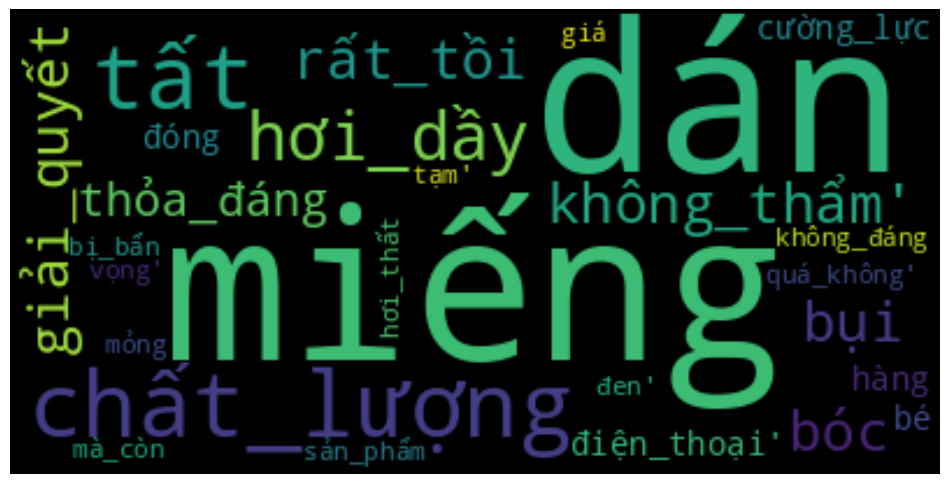

In [66]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_neutral, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nh·∫≠n x√©t:
- ƒë·ªëi v·ªõi class neutral, ta v·∫´n th·∫•y c√≥ kh√° nhi·ªÅu c√°c t·ª´ kh√¥ng th√≠ch c·ª±c, nh·ªØng t·ª´ n√†y c√≥ th·ªÉ x·∫øp v√†o c√°c v·∫•n ƒë·ªÅ c·∫ßn ph·∫£i c·∫£i thi·ªán...
- ƒë·ªëi v·ªõi ph√¢n lo·∫°i 2 bi·∫øn, ta c√≥ th·ªÉ ƒë∆∞a class n√†y v√†o class negative

### Positive

In [67]:
df_final_like = df_final[df_final['class'] == 'positive' ]
# positive
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_like.generate(str(df_final_like['processed_text'].values))

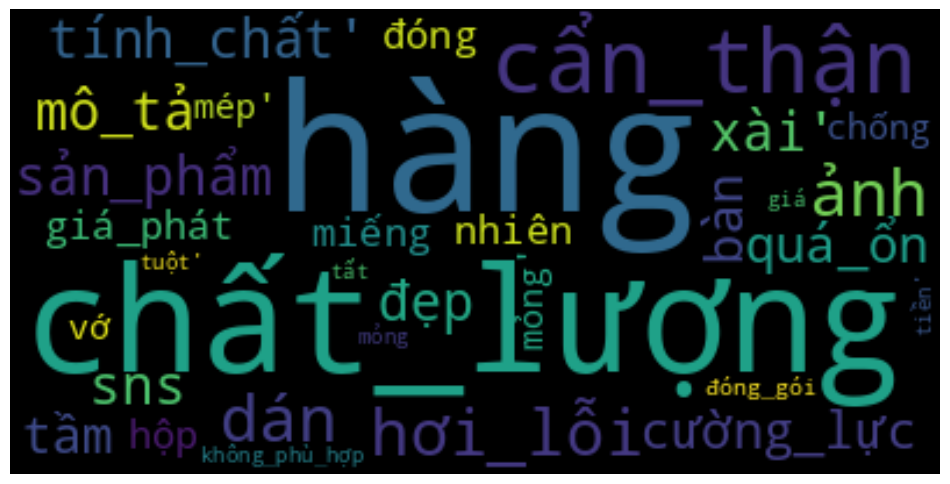

In [68]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nh·∫≠n x√©t:
- C√°c rating h√†i l√≤ng ch·ªß y·∫øu l√† c√°c ƒëi·ªÉm n·ªïi b·∫≠t nh∆∞: ch·∫•t l∆∞·ª£ng, s·∫£n ph·∫©m, gi√° c·∫£, t·∫∑ng, c·∫©n th·∫≠n...